In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv(r"D:\Work_Station\DeeplearningBasics\src\loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.shape
df.isnull().sum()
df.nunique()
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## EDA

In [4]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Remove target column if present
if 'loan_status' in numerical_features:
    numerical_features.remove('loan_status')

In [5]:
print(categorical_features)
print(numerical_features)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


## Feature Scaling
- Categorical Features
- Neumarical Features

In [6]:
## Categorical Features (Encoding)
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
## Numerical Features (Scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [8]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [9]:
df.to_csv("D:\Work_Station\DeeplearningBasics\src\processed_dataset.csv", index=False)


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\shree\AppData\Local\Temp\ipykernel_3636\249701607.py:1: SyntaxWarning: invalid escape sequence '\W'
  df.to_csv("D:\Work_Station\DeeplearningBasics\src\processed_dataset.csv", index=False)


In [10]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1


## Deep Learning Approach


In [11]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
df = pd.read_csv(r"D:\Work_Station\DeeplearningBasics\src\processed_dataset.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1


## Train Val Test Split

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Convert to tensors

In [14]:
class LoanDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        X = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return X, y


In [15]:
# Dataset instances (Inside CPU)
train_dataset = LoanDataset(X_train, y_train)
val_dataset   = LoanDataset(X_val, y_val)
test_dataset  = LoanDataset(X_test, y_test)

In [16]:
# DataLoader instances

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Neural Network

In [17]:
class LoanClassifier(nn.Module):
    def __init__(self, input_dim):
        super(LoanClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Binary classification output
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
## Loss Optimizer and Model

input_dim = X_train.shape[1]
model = LoanClassifier(input_dim).to(device)

criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

## Training Loop

In [19]:
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for features, labels in loader:
        features, labels = features.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(features).view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * features.size(0)
        preds = torch.sigmoid(outputs)
        predicted = (preds > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

In [20]:
def validate_one_epoch(model, loader, criterion):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)

            outputs = model(features).view(-1)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * features.size(0)
            preds = torch.sigmoid(outputs)
            predicted = (preds > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    accuracy = 100 * correct / total
    return avg_loss, accuracy


In [22]:
num_epochs = 20
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = validate_one_epoch(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

Epoch [1/20] | Train Loss: 0.2468, Train Acc: 88.85% | Val Loss: 0.2244, Val Acc: 89.30%
Epoch [2/20] | Train Loss: 0.2150, Train Acc: 90.20% | Val Loss: 0.2135, Val Acc: 90.04%
Epoch [3/20] | Train Loss: 0.2102, Train Acc: 90.43% | Val Loss: 0.2128, Val Acc: 89.97%
Epoch [4/20] | Train Loss: 0.2071, Train Acc: 90.53% | Val Loss: 0.2069, Val Acc: 90.22%
Epoch [5/20] | Train Loss: 0.2041, Train Acc: 90.73% | Val Loss: 0.2094, Val Acc: 90.04%
Epoch [6/20] | Train Loss: 0.2009, Train Acc: 90.82% | Val Loss: 0.2071, Val Acc: 90.53%
Epoch [7/20] | Train Loss: 0.1986, Train Acc: 90.99% | Val Loss: 0.1989, Val Acc: 90.65%
Epoch [8/20] | Train Loss: 0.1961, Train Acc: 91.15% | Val Loss: 0.1984, Val Acc: 90.84%
Epoch [9/20] | Train Loss: 0.1929, Train Acc: 91.28% | Val Loss: 0.1953, Val Acc: 90.80%
Epoch [10/20] | Train Loss: 0.1910, Train Acc: 91.21% | Val Loss: 0.1912, Val Acc: 91.27%
Epoch [11/20] | Train Loss: 0.1882, Train Acc: 91.50% | Val Loss: 0.1907, Val Acc: 91.21%
Epoch [12/20] | Tra

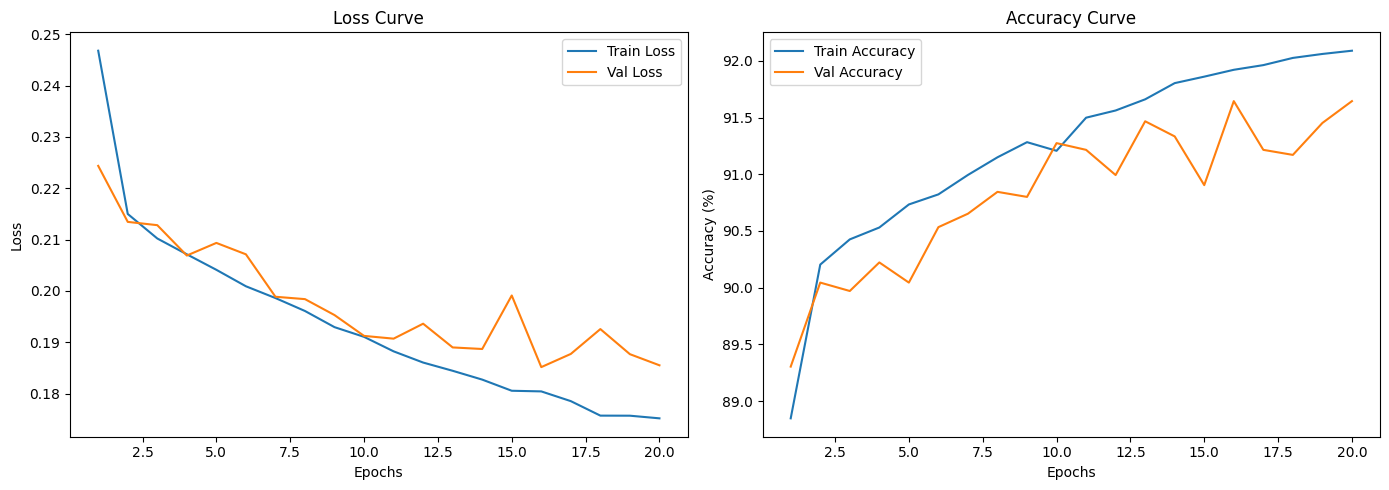

In [23]:
epochs = range(1, num_epochs+1)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation on Test Set

In [24]:
model.eval()
test_loss, test_correct, test_total = 0.0, 0, 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch).view(-1)
        loss = criterion(outputs, y_batch)

        test_loss += loss.item() * X_batch.size(0)
        preds = torch.sigmoid(outputs)
        predicted = (preds > 0.5).float()
        test_total += y_batch.size(0)
        test_correct += (predicted == y_batch).sum().item()

final_test_loss = test_loss / len(test_loader.dataset)
final_test_accuracy = 100 * test_correct / test_total

print(f"\nFinal Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")


Final Test Loss: 0.1919
Final Test Accuracy: 91.51%
